In [ ]:
#3. Import the required packages with their customary aliases as follows:

   # `import pandas as pd`   
   # `import numpy as np`  
  #  `import matplotlib.pyplot as plt`  
   # `import seaborn as sns`

In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
#4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
#Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [3]:
#5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.shape

(7662, 4)

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [6]:
#6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_df = gdp_df.rename(columns ={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df.head(1)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266


In [9]:
#7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year.What do you notice?

In [10]:
country_year_count=gdp_df.Country.value_counts(), 
country_year_count = country_year_count.to_frame()
country_year_count

,count
Country,
Least developed countries: UN classification,33
Middle East & North Africa,33
Middle East & North Africa (IDA & IBRD),33
Middle income,33
Mongolia,33
...,...
Kosovo,15
Sint Maarten (Dutch part),14
Turks and Caicos Islands,12


In [11]:
#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) 
#and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. 
#What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [288]:
gdP_2020 = gdp_df[gdp_df['Year'] == 2020]

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

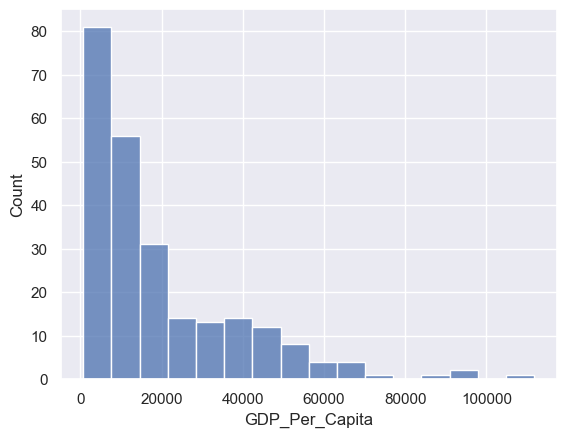

In [234]:
#Histogram
sns.set_theme(style='darkgrid')

sns.histplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])

C:\Users\theca\AppData\Local\Temp\ipykernel_7848\2164467229.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020], color = 'red', bw = .05)


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

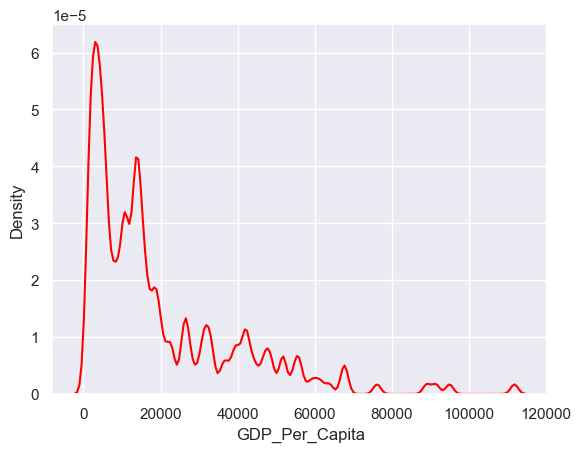

In [404]:
# DENSITY plot
sns.set_theme(style="darkgrid")
sns.kdeplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020], color = 'red', bw = .05)

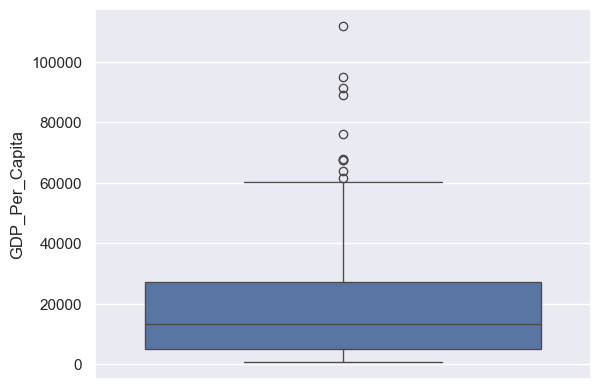

In [15]:
#BOXPLOT   -- since boxplots are only shown on the y axis the gdp per capita for 2020 needs to be the y value
sns.set_theme(style='darkgrid')
sns.boxplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

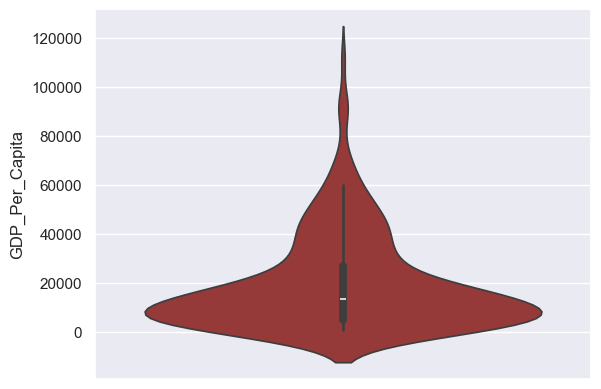

In [424]:
# VIOLIN PLOT
sns.set_theme(style="darkgrid")
df = sns.load_dataset('iris')

sns.violinplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020], color = 'brown')
plt.show()

In [17]:
#9. What was the median GDP per capita value in 2020?

In [296]:
gdP_2020['GDP_Per_Capita'].median()

13357.997573370474

In [19]:
#10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
#	* A boxplot
#	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
#	* A scatterplot
#	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
#Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [20]:
gdp_df_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

In [21]:
gdp_df_decades.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


<Axes: ylabel='GDP_Per_Capita'>

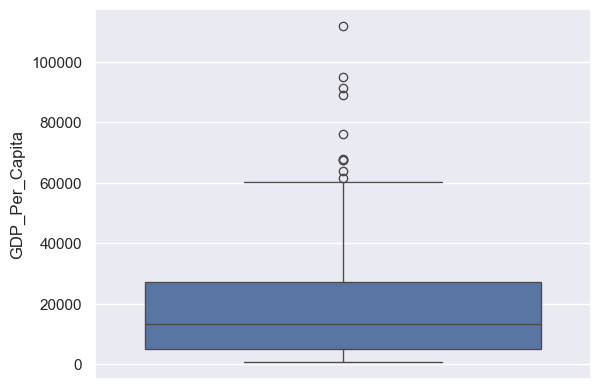

In [388]:
#BOXPLOT
sns.set_theme(style='darkgrid')
sns.boxplot(gdp_df_decades.GDP_Per_Capita.loc[gdp_df_decades.Year == 2020])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

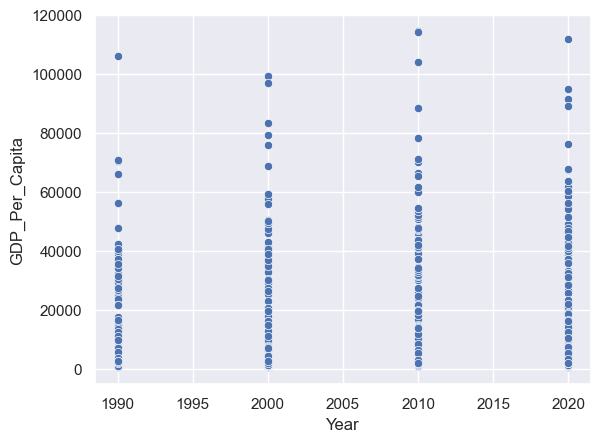

In [385]:
#Scatterplot
df = sns.load_dataset('iris')

sns.scatterplot(x=gdp_df_decades["Year"], y=gdp_df_decades["GDP_Per_Capita"])

In [22]:
#11. Which country was the first to have a GDP per capita greater than $100,000?

In [23]:
first_to_100k = gdp_df[gdp_df['GDP_Per_Capita'] >= 100000]

In [25]:
first_to_100k_sorted = first_to_100k.sort_values(by = 'Year')

In [26]:
first_to_100k_sorted.reset_index()


,index,Country,Year,GDP_Per_Capita
0,7302,United Arab Emirates,1990,105893.626059
1,7301,United Arab Emirates,1991,101048.696239
2,7295,United Arab Emirates,1997,100956.706467
3,4167,Luxembourg,2001,101143.147977
4,4166,Luxembourg,2002,103317.331098
5,4165,Luxembourg,2003,104743.000088
6,4164,Luxembourg,2004,107634.837198
7,4163,Luxembourg,2005,108632.360016
8,4162,Luxembourg,2006,113346.035782
9,4161,Luxembourg,2007,120647.822959


In [27]:
first_to_100k_sorted = first_to_100k_sorted.reset_index(drop = True)

In [28]:
first_to_100k_sorted.head(1)
#UAE in 1990

,Country,Year,GDP_Per_Capita
0,United Arab Emirates,1990,105893.626059


In [29]:
#12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [107]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

In [109]:
highest_gdp_country = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False).head(1)
#Luxembourg

In [69]:
Luxembourg_data = gdp_df.loc[gdp_df.Country == 'Luxembourg']

In [95]:
year_sort_asc_luxembourg = Luxembourg_data.sort_values(by= 'Year', ascending=True)

In [73]:
year_sort_asc_luxembourg.head()

,Country,Year,GDP_Per_Capita
4178,Luxembourg,1990,70860.819124
4177,Luxembourg,1991,75961.668717
4176,Luxembourg,1992,76323.304753
4175,Luxembourg,1993,78468.921760
4174,Luxembourg,1994,80365.224508


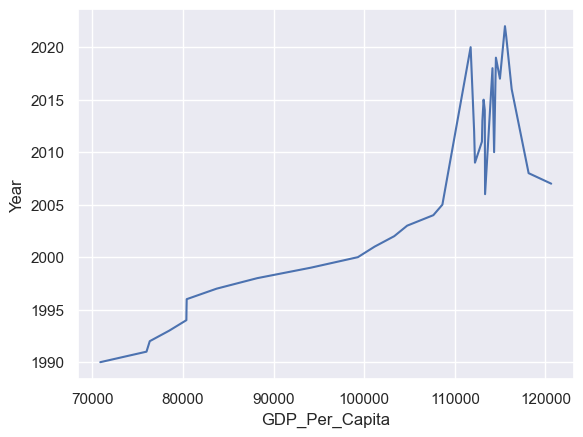

In [75]:
sns.lineplot( x = year_sort_asc_luxembourg['GDP_Per_Capita'], y= year_sort_asc_luxembourg['Year'])
plt.show()

In [36]:
#13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
#**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [113]:
lowest_gdp_country = gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True).head(1)
lowest_gdp_country.head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [122]:
Burundi_data = gdp_df.loc[gdp_df.Country == 'Burundi']
Burundi_data

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


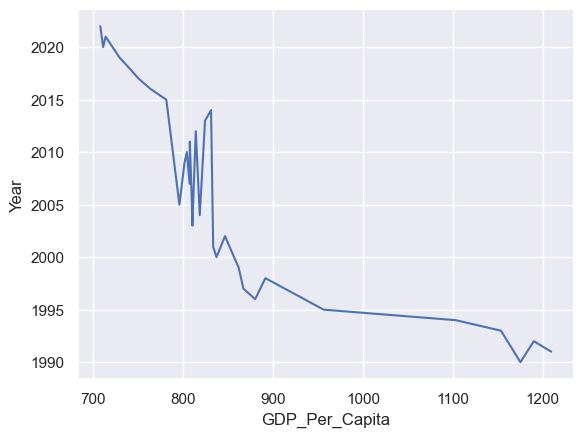

In [126]:
sns.lineplot( x = Burundi_data['GDP_Per_Capita'], y= Burundi_data['Year']);

In [ ]:
#14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
#Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [128]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows= 6083)


In [130]:
internet_df


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [132]:
#15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [134]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [136]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [138]:
internet_df.sort_values(by = 'Year')

,Country,Year,Internet_Users_Pct
6082,Zimbabwe,1990,0.0000
4988,Slovakia,1990,0.0000
598,Benin,1990,0.0000
1747,El Salvador,1990,0.0000
5019,Slovenia,1990,0.0000
...,...,...,...
3141,Latvia,2023,92.1879
1656,Ecuador,2023,72.6943
1537,Denmark,2023,98.7756
340,Azerbaijan,2023,88.0000


In [298]:
#16. Look at the number of observations in this dataset per year. What do you notice?

#At the beginning of the data it shows that next to no one used or even had access to the internet. Makes sense because it's 1990, and
#the only people who are interested in the internet are goverments, investrors and nerds. However in just 33 years, the overwhelming majority of each countries
#population uses the internet. At this point it is uncommon to meet someone without internet use or access to the internet as  as opposed to just
#over 3 decades ago

In [143]:
#17. What is the first year to have a non-zero internet users percentage value?


In [224]:
internet_df.loc[internet_df['Internet_Users_Pct']>0].sort_values(by = 'Year', ascending = True).head(1)

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277


In [147]:
#18. How does the distribution of internet users percent differ for 2000 and 2014?

In [226]:
user_percent_2000 = internet_df.loc[internet_df['Year']== 2000] 

In [340]:
type(user_percent_2000)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Percentage of Internet Users in 2000')

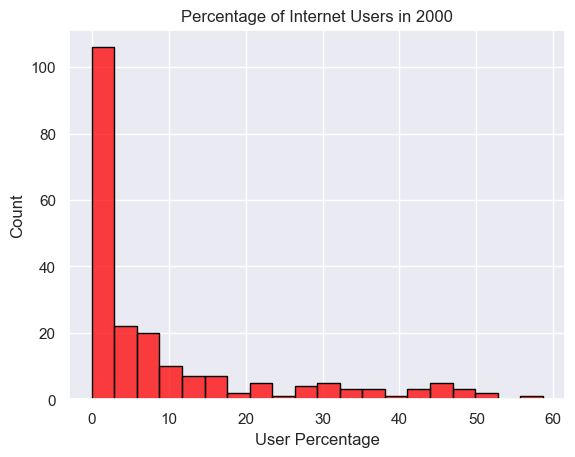

In [270]:
sns.set_theme(style='darkgrid')

sns.histplot(internet_df.Internet_Users_Pct.loc[internet_df.Year == 2000], bins = 20, color = 'red', edgecolor ='black')

plt.xlabel('User Percentage')
plt.title('Percentage of Internet Users in 2000')


Text(0.5, 1.0, 'Percentage of Internet Users in 2014')

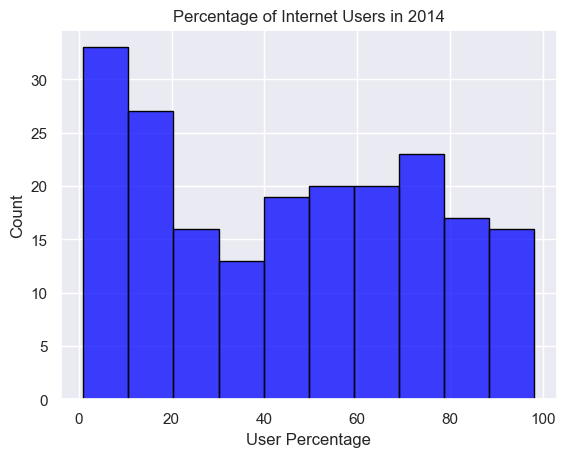

In [284]:
sns.set_theme(style='darkgrid')

sns.histplot(internet_df.Internet_Users_Pct.loc[internet_df.Year == 2014], bins = 10, color = 'blue', edgecolor ='black')

plt.xlabel('User Percentage')
plt.title('Percentage of Internet Users in 2014')

In [150]:
#19. For how many countries was the percentage of internet users below 5% in 2014?

In [152]:
year_2014= internet_df[internet_df.Year == 2014]

In [154]:
year_2014[year_2014['Internet_Users_Pct'] <5]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [156]:
len(year_2014[year_2014['Internet_Users_Pct'] <5])

10

In [158]:
#20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
#Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [316]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                               left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], how = 'left')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,17.6
3,Afghanistan,2018,2060.698973,16.8
4,Afghanistan,2017,2096.093111,13.5


In [ ]:
#21. Find the three countries with the highest internet users percentage in 2014. 
#Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) 

In [342]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]

In [352]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.reset_index()

In [354]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.reset_index(drop = True)

In [362]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.reset_index(drop = True)
gdp_and_internet_use_2014.head()

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,7,Afghanistan,2014,2144.449634,7.0
1,28,Africa Eastern and Southern,2014,3642.875373,NaN
2,61,Africa Western and Central,2014,4146.994622,NaN
3,94,Albania,2014,11586.817446,54.3
4,127,Algeria,2014,11561.259795,29.5


pandas.core.frame.DataFrame

In [ ]:
#22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [366]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]

In [368]:
type(gdp_and_internet_use_2014)

pandas.core.frame.DataFrame

In [370]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.reset_index()

In [372]:
gdp_and_internet_use_2014 = gdp_and_internet_use_2014.reset_index(drop = True)

In [374]:
gdp_and_internet_use_2014

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,7,Afghanistan,2014,2144.449634,7.0000
1,28,Africa Eastern and Southern,2014,3642.875373,NaN
2,61,Africa Western and Central,2014,4146.994622,NaN
3,94,Albania,2014,11586.817446,54.3000
4,127,Algeria,2014,11561.259795,29.5000
...,...,...,...,...,...
237,7509,Viet Nam,2014,7641.909252,41.0000
238,7542,West Bank and Gaza,2014,5967.073437,NaN
239,7571,World,2014,15120.730322,NaN
240,7604,Zambia,2014,3375.941270,6.5000


In [ ]:
#23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? 
#If you see any unusual points, investigate them.